In [32]:
import pandas as pd
import re
import unicodedata
import nltk
import prepare

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

1. Spam Data

    - Load the spam data set.
    - Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    - Is there any overlap in the bigrams for the spam data and the ham data?
    - Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.
    
2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [2]:
df = pd.read_csv('spam_clean.csv')

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [6]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [9]:
# Create and explore bigrams for the spam data. 
# Visualize them with a word cloud. 
# How do they compare with the ham bigrams?

# ham_words = clean(' '.join(df[df.label == 'ham'].text))
# spam_words = clean(' '.join(df[df.label == 'spam'].text))
# all_words = clean(' '.join(df.text))

In [10]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [11]:
ham_w = clean(' '.join(df[df.label == 'ham'].text))

In [12]:
ham_w

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

In [13]:
ham_freq = pd.Series(ham_w).value_counts()

In [14]:
ham_freq.head(10)

im      449
get     314
go      273
ok      272
dont    257
come    242
know    241
call    241
ur      240
ill     236
dtype: int64

In [15]:
ham_freq.isnull().sum()

0

In [16]:
spam_w = clean(' '.join(df[df.label == 'ham'].text))

In [17]:
spam_w

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

In [18]:
spam_freq = pd.Series(spam_w).value_counts()

In [19]:
spam_freq.isnull().sum()

0

In [20]:
spam_freq.head(10)

im      449
get     314
go      273
ok      272
dont    257
come    242
know    241
call    241
ur      240
ill     236
dtype: int64

In [21]:
all_w = clean(' '.join(df.text))

In [22]:
all_w

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'cu

In [23]:
words_freq = pd.Series(all_w).value_counts()

In [24]:
words_freq.isnull().sum()

0

In [25]:
words_freq.head()

call    600
im      462
get     397
ur      384
go      304
dtype: int64

In [29]:
word_counts = (pd.concat([words_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
0,3,0,0
008704050406,2,0,0
0089my,1,0,0
0121,1,0,0
01223585236,1,0,0


In [30]:
word_counts.sort_values(by='all', ascending=False).head(15)

,all,ham,spam
call,600,241,241
im,462,449,449
get,397,314,314
ur,384,240,240
go,304,273,273
4,287,168,168
dont,279,257,257
ok,277,272,272
free,275,59,59
know,267,241,241


In [31]:
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(10),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(10)])

,all,ham,spam
864233,1,0,0
861,2,0,0
86021,6,0,0
85555,1,0,0
8552,4,0,0
85233,1,0,0
85222,1,0,0
85069,2,0,0
87070,1,0,0
zouk,1,0,0


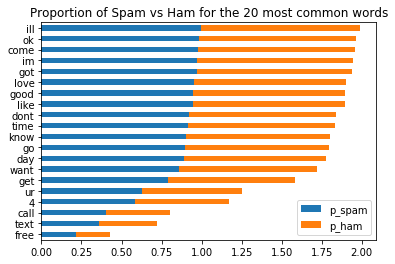

In [34]:
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')
plt.show()

In [35]:
(word_counts
 [(word_counts.spam > 10) & (word_counts.ham > 10)]
 .assign(ratio=lambda df: df.spam / (df.ham + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,ham,spam,ratio
frm,11,11,11,0.999092
cheer,11,11,11,0.999092
asking,11,11,11,0.999092
christmas,12,11,11,0.999092
pm,13,11,11,0.999092
dont,279,257,257,0.999961
ok,277,272,272,0.999963
go,304,273,273,0.999963
get,397,314,314,0.999968
im,462,449,449,0.999978


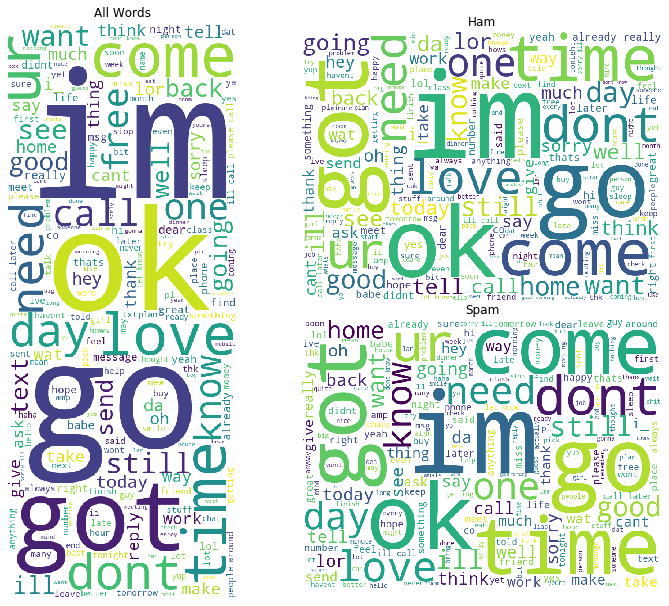

In [38]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_w))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_w))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_w))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')